In [2]:
import wget
wget.download(url='https://zenodo.org/record/8190744/files/EELS_STO.dm3?download=1',
              out = 'EELS_STO.dm3')

'EELS_STO.dm3'

In [10]:
import numpy as np
import matplotlib.pyplot as plt

import pyTEMlib
# import pyTEMlib.interactive_eels as ieels -> 현재 지원하지 않음

In [3]:
pyTEMlib.__version__

'0.2025.02.2'

In [8]:
import pyTEMlib.file_tools as ft 

f = 'EELS_STO.dm3'
datasets = ft.open_file(f)
chooser = ft.ChooseDataset(datasets)

dataset = chooser.dataset

Dropdown(description='select dataset:', options=('Channel_000: 01-EELS Acquire_STO',), value='Channel_000: 01-…

In [9]:
datasets

{'Channel_000': sidpy.Dataset of type SPECTRUM with:
  dask.array<array, shape=(2048,), dtype=float32, chunksize=(2048,), chunktype=numpy.ndarray>
  data contains: intensity (counts)
  and Dimensions: 
 energy_loss:  energy-loss (eV) of size (2048,)
  with metadata: ['experiment', 'filename']}

In [ ]:
help(chooser)

Help on ChooseDataset in module pyTEMlib.file_tools object:

class ChooseDataset(builtins.object)
 |  ChooseDataset(input_object, show_dialog=True)
 |  
 |  Widget to select dataset object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, input_object, show_dialog=True)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  get_dataset_list(self)
 |      Get by Log number sorted list of datasets
 |  
 |  set_dataset(self, b)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [6]:
chooser.__dict__

{'datasets': {'Channel_000': sidpy.Dataset of type SPECTRUM with:
   dask.array<array, shape=(2048,), dtype=float32, chunksize=(2048,), chunktype=numpy.ndarray>
   data contains: intensity (counts)
   and Dimensions: 
  energy_loss:  energy-loss (eV) of size (2048,)
   with metadata: ['experiment', 'filename']},
 'dataset_names': ['Channel_000'],
 'dataset_list': ['Channel_000: 01-EELS Acquire_STO'],
 'dataset_type': None,
 'dataset': sidpy.Dataset of type SPECTRUM with:
  dask.array<array, shape=(2048,), dtype=float32, chunksize=(2048,), chunktype=numpy.ndarray>
  data contains: intensity (counts)
  and Dimensions: 
 energy_loss:  energy-loss (eV) of size (2048,)
  with metadata: ['experiment', 'filename'],
 'reader': None,
 'select_image': Dropdown(description='select dataset:', options=('Channel_000: 01-EELS Acquire_STO',), value='Channel_000: 01-EELS Acquire_STO'),
 'key': 'Channel_000'}

In [7]:
chooser.dataset

sidpy.Dataset of type SPECTRUM with:
 dask.array<array, shape=(2048,), dtype=float32, chunksize=(2048,), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
energy_loss:  energy-loss (eV) of size (2048,)
 with metadata: ['experiment', 'filename']

In [101]:
help(chooser.dataset.data_type)

Help on DataType in module sidpy.sid.dataset object:

class DataType(enum.Enum)
 |  DataType(value, names=None, *, module=None, qualname=None, type=None, start=1)
 |  
 |  An enumeration.
 |  
 |  Method resolution order:
 |      DataType
 |      enum.Enum
 |      builtins.object
 |  
 |  Data and other attributes defined here:
 |  
 |  IMAGE = <DataType.IMAGE: 4>
 |  
 |  IMAGE_4D = <DataType.IMAGE_4D: 8>
 |  
 |  IMAGE_MAP = <DataType.IMAGE_MAP: 5>
 |  
 |  IMAGE_STACK = <DataType.IMAGE_STACK: 6>
 |  
 |  LINE_PLOT = <DataType.LINE_PLOT: 2>
 |  
 |  LINE_PLOT_FAMILY = <DataType.LINE_PLOT_FAMILY: 3>
 |  
 |  POINT_CLOUD = <DataType.POINT_CLOUD: 9>
 |  
 |  SPECTRAL_IMAGE = <DataType.SPECTRAL_IMAGE: 7>
 |  
 |  SPECTRUM = <DataType.SPECTRUM: 1>
 |  
 |  UNKNOWN = <DataType.UNKNOWN: -1>
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from enum.Enum:
 |  
 |  name
 |      The name of the Enum member.
 |  
 |  value
 |      Th

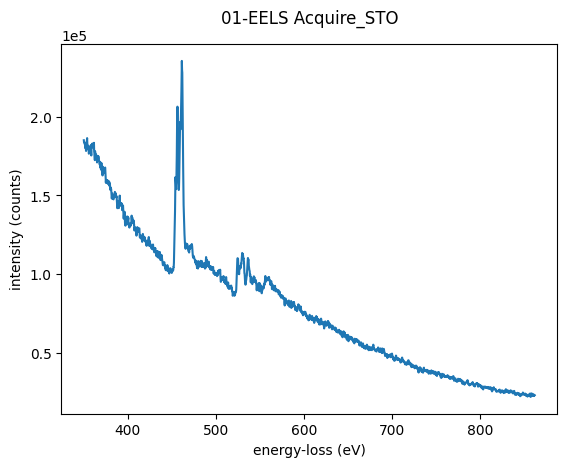

In [11]:
view = dataset.plot()

In [110]:
dataset.metadata

{'experiment': {'single_exposure_time': 2.0,
  'exposure_time': 20.0,
  'number_of_frames': 10,
  'collection_angle': 33.0,
  'convergence_angle': 30.0,
  'acceleration_voltage': 200000.0}}

In [7]:
import wget
wget.download(url = "https://github.com/gduscher/MLSTEM2024/raw/main/example_data/STO_Stack_10.dm3",out = 'EELS_STO10.dm3')

'EELS_STO10.dm3'

In [13]:
import pyTEMlib.file_tools as ft 
import pyTEMlib
# 링크의 데이터와 다르다.
# 최대한 비슷한 환경으로 유사한 결과를 도출하고자 하였다.
f = 'EELS_STO10.dm3'
datasets = ft.open_file(f)
chooser = ft.ChooseDataset(datasets)

dataset = chooser.dataset

Dropdown(description='select dataset:', options=('Channel_000: 20-3D Stack_10',), value='Channel_000: 20-3D St…

In [14]:
dataset

sidpy.Dataset of type IMAGE_STACK with:
 dask.array<array, shape=(512, 512, 25), dtype=float32, chunksize=(512, 512, 25), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
x:  number (frame) of size (512,)
y:  number (frame) of size (512,)
z:  number (frame) of size (25,)
 with metadata: ['experiment', 'filename']

In [15]:
fileWidget = pyTEMlib.file_tools.FileWidget()

In [16]:
datasets = fileWidget.datasets
dataset = fileWidget.selected_dataset

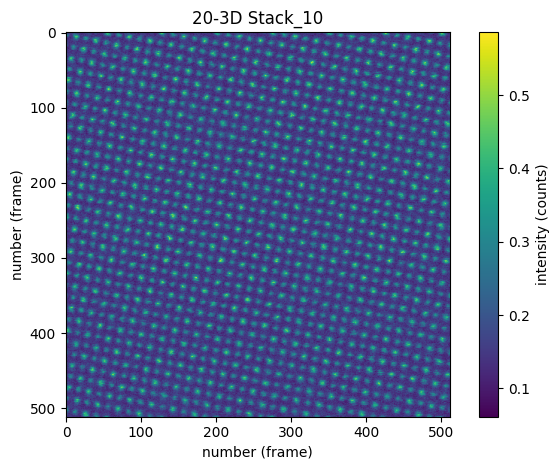

In [ ]:
# image 512x512 size 25장 stack
dataset.x.dimension_type = 'spatial'
dataset.y.dimension_type = 'spatial'
dataset.set_dimension
view = dataset.plot()

In [9]:
import sys
import os

data_generator_path = r"C:\Test_pycroscopy\DataGenSTEM\DataGenSTEM"
sys.path.append(data_generator_path)

# https://github.com/AustinHouston/DataGenSTEM.git 
import data_generator as dg

image_array = np.array(dataset)[:,:,0]

NameError: name 'np' is not defined

In [19]:
# crop_size, n_crops에 맞게 전체 이미지 crop / magnification_var로 crop_size도 일정 랜덤하게 조정 가능
image_array.shape
cropped_data = dg.shotgun_crop(image_array, crop_size=256, n_crops=5)

In [ ]:
# 원본이미지 한장에서 512,512 에서 256x256 5장 생성
cropped_data.shape

(5, 256, 256)

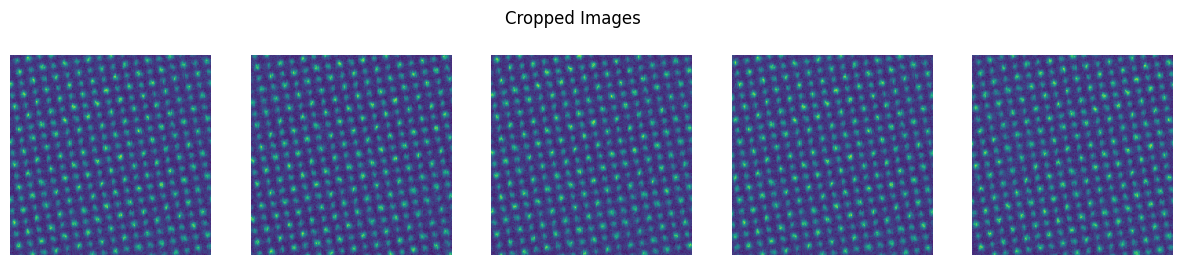

In [23]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axs[i].imshow(cropped_data[i])
    axs[i].axis('off')
fig.suptitle("Cropped Images")
plt.show()

In [1]:
import secrets
from ase.io import read
from ase.visualize import view
from sklearn.model_selection import train_test_split

In [2]:
# https://github.com/AustinHouston/DataGenSTEM.git 에서 얻은 데이터
path = r"C:\Test_pycroscopy\DataGenSTEM\crystal_files\SrTiO3.cif"
# 처음은 unit_cell만 나오므로 x,y방향 각각 50배씩
xtal = read(path)*(50,50,1)

In [3]:
# cubic이라 3.912,3.912,3.912 였던 cell size 증가
xtal.cell

Cell([195.6350655, 195.6350655, 3.91270131])

In [4]:
# 38 : Sr/ 22 : Ti/ 8: O
xtal.arrays

{'numbers': array([38, 22,  8, ...,  8,  8,  8]),
 'positions': array([[  0.        ,   0.        ,   0.        ],
        [  1.95635066,   1.95635066,   1.95635066],
        [  0.        ,   1.95635066,   1.95635066],
        ...,
        [191.72236419, 193.67871485,   1.95635066],
        [193.67871485, 191.72236419,   1.95635066],
        [193.67871485, 193.67871485,   0.        ]]),
 'spacegroup_kinds': array([0, 1, 2, ..., 2, 2, 2])}

In [5]:
# 총 12500개의 원소(2500 * 5) x,y,z 좌표
xtal.arrays['positions'].shape

(12500, 3)

In [12]:
# x,y좌표만 추출 : positions -> 이미지의 x,y경계 설정
positions = xtal.get_positions()[:, :2]
xmin, xmax = np.min(positions[:, 0]), np.max(positions[:, 0])
ymin, ymax = np.min(positions[:, 1]), np.max(positions[:, 1])
borders = 1
axis_extent = (xmin - borders, xmax + borders, ymin - borders, ymax + borders)
pixel_size = 0.07 # pixel size는 0.07옹스트롬

In [13]:

rotation = 0
phonon_sigma = 0.10
n_vacancies = 10

# 단순 50배만 진행하였기에 vacancy, rotation 등의 변화
rot_xtal = dg.get_imaging_xtal(xtal = xtal, 
                              n_cells = (1,1,1), 
                              rotation = rotation, 
                              n_vacancies = n_vacancies, 
                              phonon_sigma = phonon_sigma, 
                              axis_extent = axis_extent)

(-0.5, 2794.5, 2794.5, -0.5)

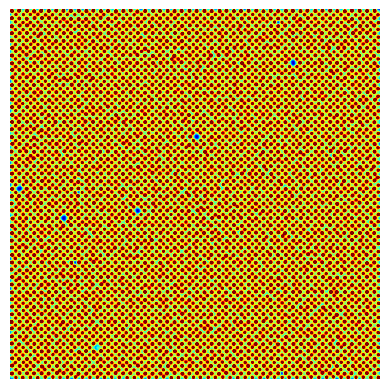

In [14]:
potential = dg.get_pseudo_potential(xtal = rot_xtal,
                                    pixel_size = pixel_size,
                                    sigma = 0.1,
                                    axis_extent = axis_extent,
                                    mode = 'gaussian')

fig, ax = plt.subplots(1, 1)
ax.imshow(potential, cmap='jet', vmin=0, vmax=0.5)
ax.axis('off')

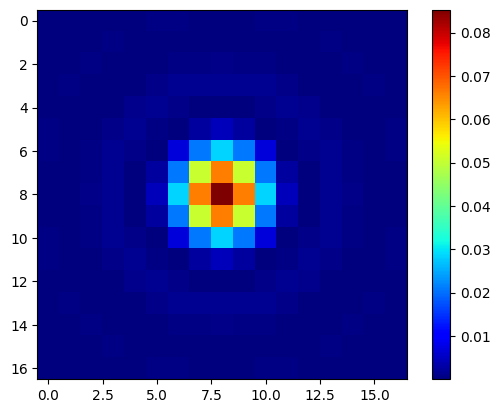

In [15]:
psf = dg.get_point_spread_function(airy_disk_radius = 1, size = 8)

fig, ax = plt.subplots(1, 1)
ax.imshow(psf, cmap='jet')
fig.colorbar(ax.imshow(psf, cmap='jet'), ax=ax)

In [16]:
# Oxygen제거
to_delete = []
for atom in rot_xtal:
    if atom.symbol == 'O':
        to_delete.append(atom.index)

mask_xtal = rot_xtal.copy()
del mask_xtal[to_delete]

In [17]:
# Image = Potential X PSF
perfect_image = dg.convolve_kernel(potential, psf)

# sampling noise 추가
count_statistics = 0.8
noisy_image = dg.add_poisson_noise(perfect_image, shot_noise = count_statistics)

# x,y좌표에 따른 원소 저장
masks = dg.get_masks(mask_xtal, axis_extent = axis_extent, pixel_size = pixel_size, radius = 8, mode='integer')

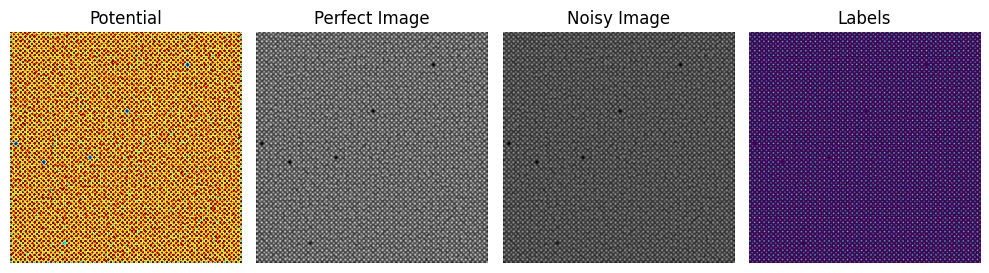

In [18]:
fig, ax = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(10, 5))

ax[0].set_title('Potential')
ax[0].imshow(potential, cmap='jet', vmax=0.5)

ax[1].set_title('Perfect Image')
ax[1].imshow(perfect_image, cmap='gray')

ax[2].set_title('Noisy Image')
ax[2].imshow(noisy_image, cmap='gray')

ax[3].set_title('Labels')
ax[3].imshow(masks, cmap='viridis')

for ax in ax:
    ax.axis('off')
fig.tight_layout()

In [19]:
# Crop and zoom
n_crops = 5
crop_size = 256
magnification_var = 0.3

batch_ims = dg.shotgun_crop(noisy_image, crop_size = crop_size, n_crops = n_crops, seed = 42, magnification_var = magnification_var, roi = 'middle')
batch_ims = batch_ims.reshape(-1,crop_size,crop_size)
print('Image shape:', batch_ims.shape)

batch_masks = dg.shotgun_crop(masks, crop_size = crop_size, n_crops = n_crops, seed = 42, magnification_var = magnification_var, return_binary = True, roi = 'middle')
print('Mask shape:', batch_masks.shape)

Image shape: (5, 256, 256)
Mask shape: (5, 256, 256)


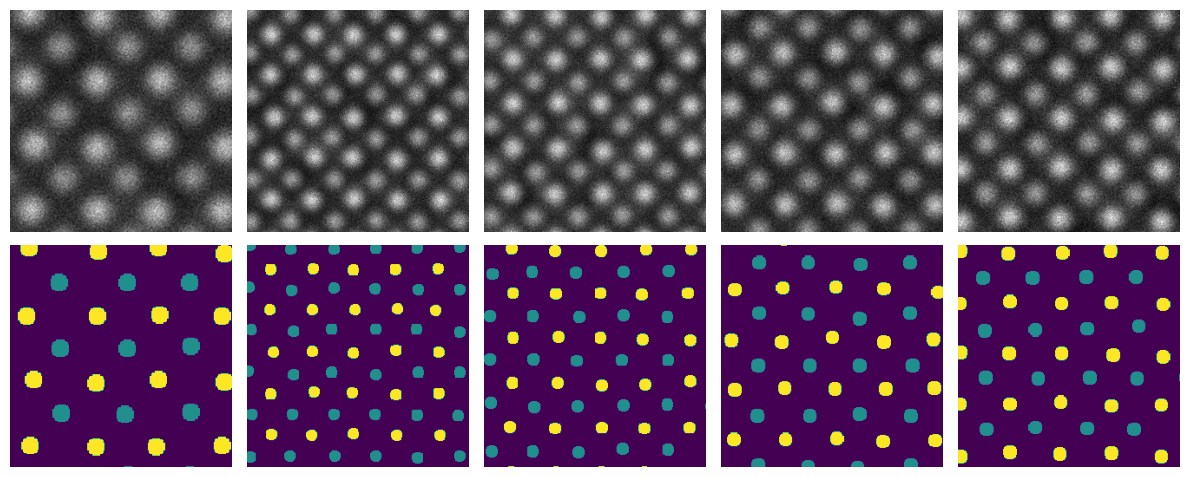

In [20]:

fig, axs = plt.subplots(2, 5, sharex=True, sharey=True, figsize=(12, 5))

for i, ax in enumerate(axs[0,:]):
    ax.imshow(batch_ims[i], cmap='gray')
    ax.axis('off')
for i, ax in enumerate(axs[1,:]):
    ax.imshow(batch_masks[i], cmap='viridis')
    ax.axis('off')

fig.tight_layout()

In [ ]:
positions = xtal.get_positions()[:, :2]
xmin, xmax = np.min(positions[:, 0]), np.max(positions[:, 0])
ymin, ymax = np.min(positions[:, 1]), np.max(positions[:, 1])
borders = 1
axis_extent = (xmin - borders, xmax + borders, ymin - borders, ymax + borders)
# 200장 생성 / 160 train , 40 test image
n_images= 200
image_counter = 0
master_images = np.zeros((n_images, crop_size, crop_size))
master_labels = np.zeros((n_images, crop_size, crop_size))

while image_counter < n_images:
    master_seed = secrets.randbits(128)
    rng = np.random.default_rng(master_seed)

    phonon_sigma = rng.uniform(0.05, 0.10)
    rotation = rng.uniform(0,360)
    atom_var = rng.normal(loc = 0.1, scale = 0.01)
    airy_disk_size = 1
    shot_noise = rng.uniform(0.6, 0.9)
    magnification_var = rng.uniform(0.2, 0.35)
    crop_param_seed = rng.integers(0, 1000000)

    rot_xtal = dg.get_imaging_xtal(xtal = xtal, 
                                n_cells = (1,1,1), 
                                rotation = rotation, 
                                n_vacancies = 10, 
                                phonon_sigma = phonon_sigma, 
                                axis_extent = axis_extent)

    potential = dg.get_pseudo_potential(xtal = rot_xtal,
                                        pixel_size = pixel_size,
                                        sigma = atom_var,
                                        axis_extent = axis_extent)
    potential /= np.max(potential)

    psf = dg.get_point_spread_function(airy_disk_radius = airy_disk_size, size = 8)

    # Delete Oxygen Atoms
    to_delete = []
    for atom in rot_xtal:
        if atom.symbol == 'O':
            to_delete.append(atom.index)

    mask_xtal = rot_xtal.copy()
    del mask_xtal[to_delete]

    perfect_image = dg.convolve_kernel(potential, psf)
    noisy_image = dg.add_poisson_noise(perfect_image, shot_noise = shot_noise)
    masks = dg.get_masks(mask_xtal, axis_extent = axis_extent, pixel_size = pixel_size, radius = 8, mode='integer')

    batch_ims = dg.shotgun_crop(noisy_image, crop_size = crop_size, n_crops = n_crops, seed = crop_param_seed, magnification_var = magnification_var, roi = 'middle')
    batch_ims = batch_ims.reshape(-1,crop_size,crop_size)
    batch_masks = dg.shotgun_crop(masks, crop_size = crop_size, n_crops = n_crops, seed = crop_param_seed, magnification_var = magnification_var, return_binary = True, roi = 'middle')

    for i, (image, mask) in enumerate(zip(batch_ims, batch_masks)):
        image = image - np.min(image)
        image = image / np.max(image)
        master_images[image_counter] = image
        master_labels[image_counter] = mask
        image_counter += 1

X_train, X_test, y_train, y_test = train_test_split(master_images, master_labels, test_size=0.2, random_state=42)
np.savez('training_data.npz', X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

C:\Users\pmsda\AppData\Local\Temp\ipykernel_6512\2351129382.py:58: RuntimeWarning: invalid value encountered in divide
  image = image / np.max(image)
